Importing the Dependencies

In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Data Collection and Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
liver_data = pd.read_csv(r"C:\Users\pavan\Desktop\A Healthcare System using Machine Learning Techniques for Disease Prediction with Chatbot Assistance\Datasets\liver.csv")

In [3]:
# printing the first 5 rows of the dataframe
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# number of rows and columns in the dataframe
liver_data.shape

(583, 11)

In [5]:
# getting more information about the dataset
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
liver_data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
#filling missing values in Albumin_and_Globulin_Ratio by mean of their values
liver_data.Albumin_and_Globulin_Ratio.fillna(liver_data.Albumin_and_Globulin_Ratio.mean(), inplace=True)

In [8]:
# getting some statistical measures about the data
liver_data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
# distribution of target Variable
liver_data['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

1  --> Liver Disease Positive

2  --> Healthy

In [10]:
# grouping the data bas3ed on the target variable
liver_data.groupby('Dataset').mean()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Dataset,,,,,,,,,
1,46.153846,4.164423,1.923558,319.007212,99.605769,137.699519,6.459135,3.060577,0.914337
2,41.239521,1.142515,0.396407,219.754491,33.652695,40.688623,6.543114,3.344311,1.028588


Text(0.5, 1.0, 'Correlation between features')

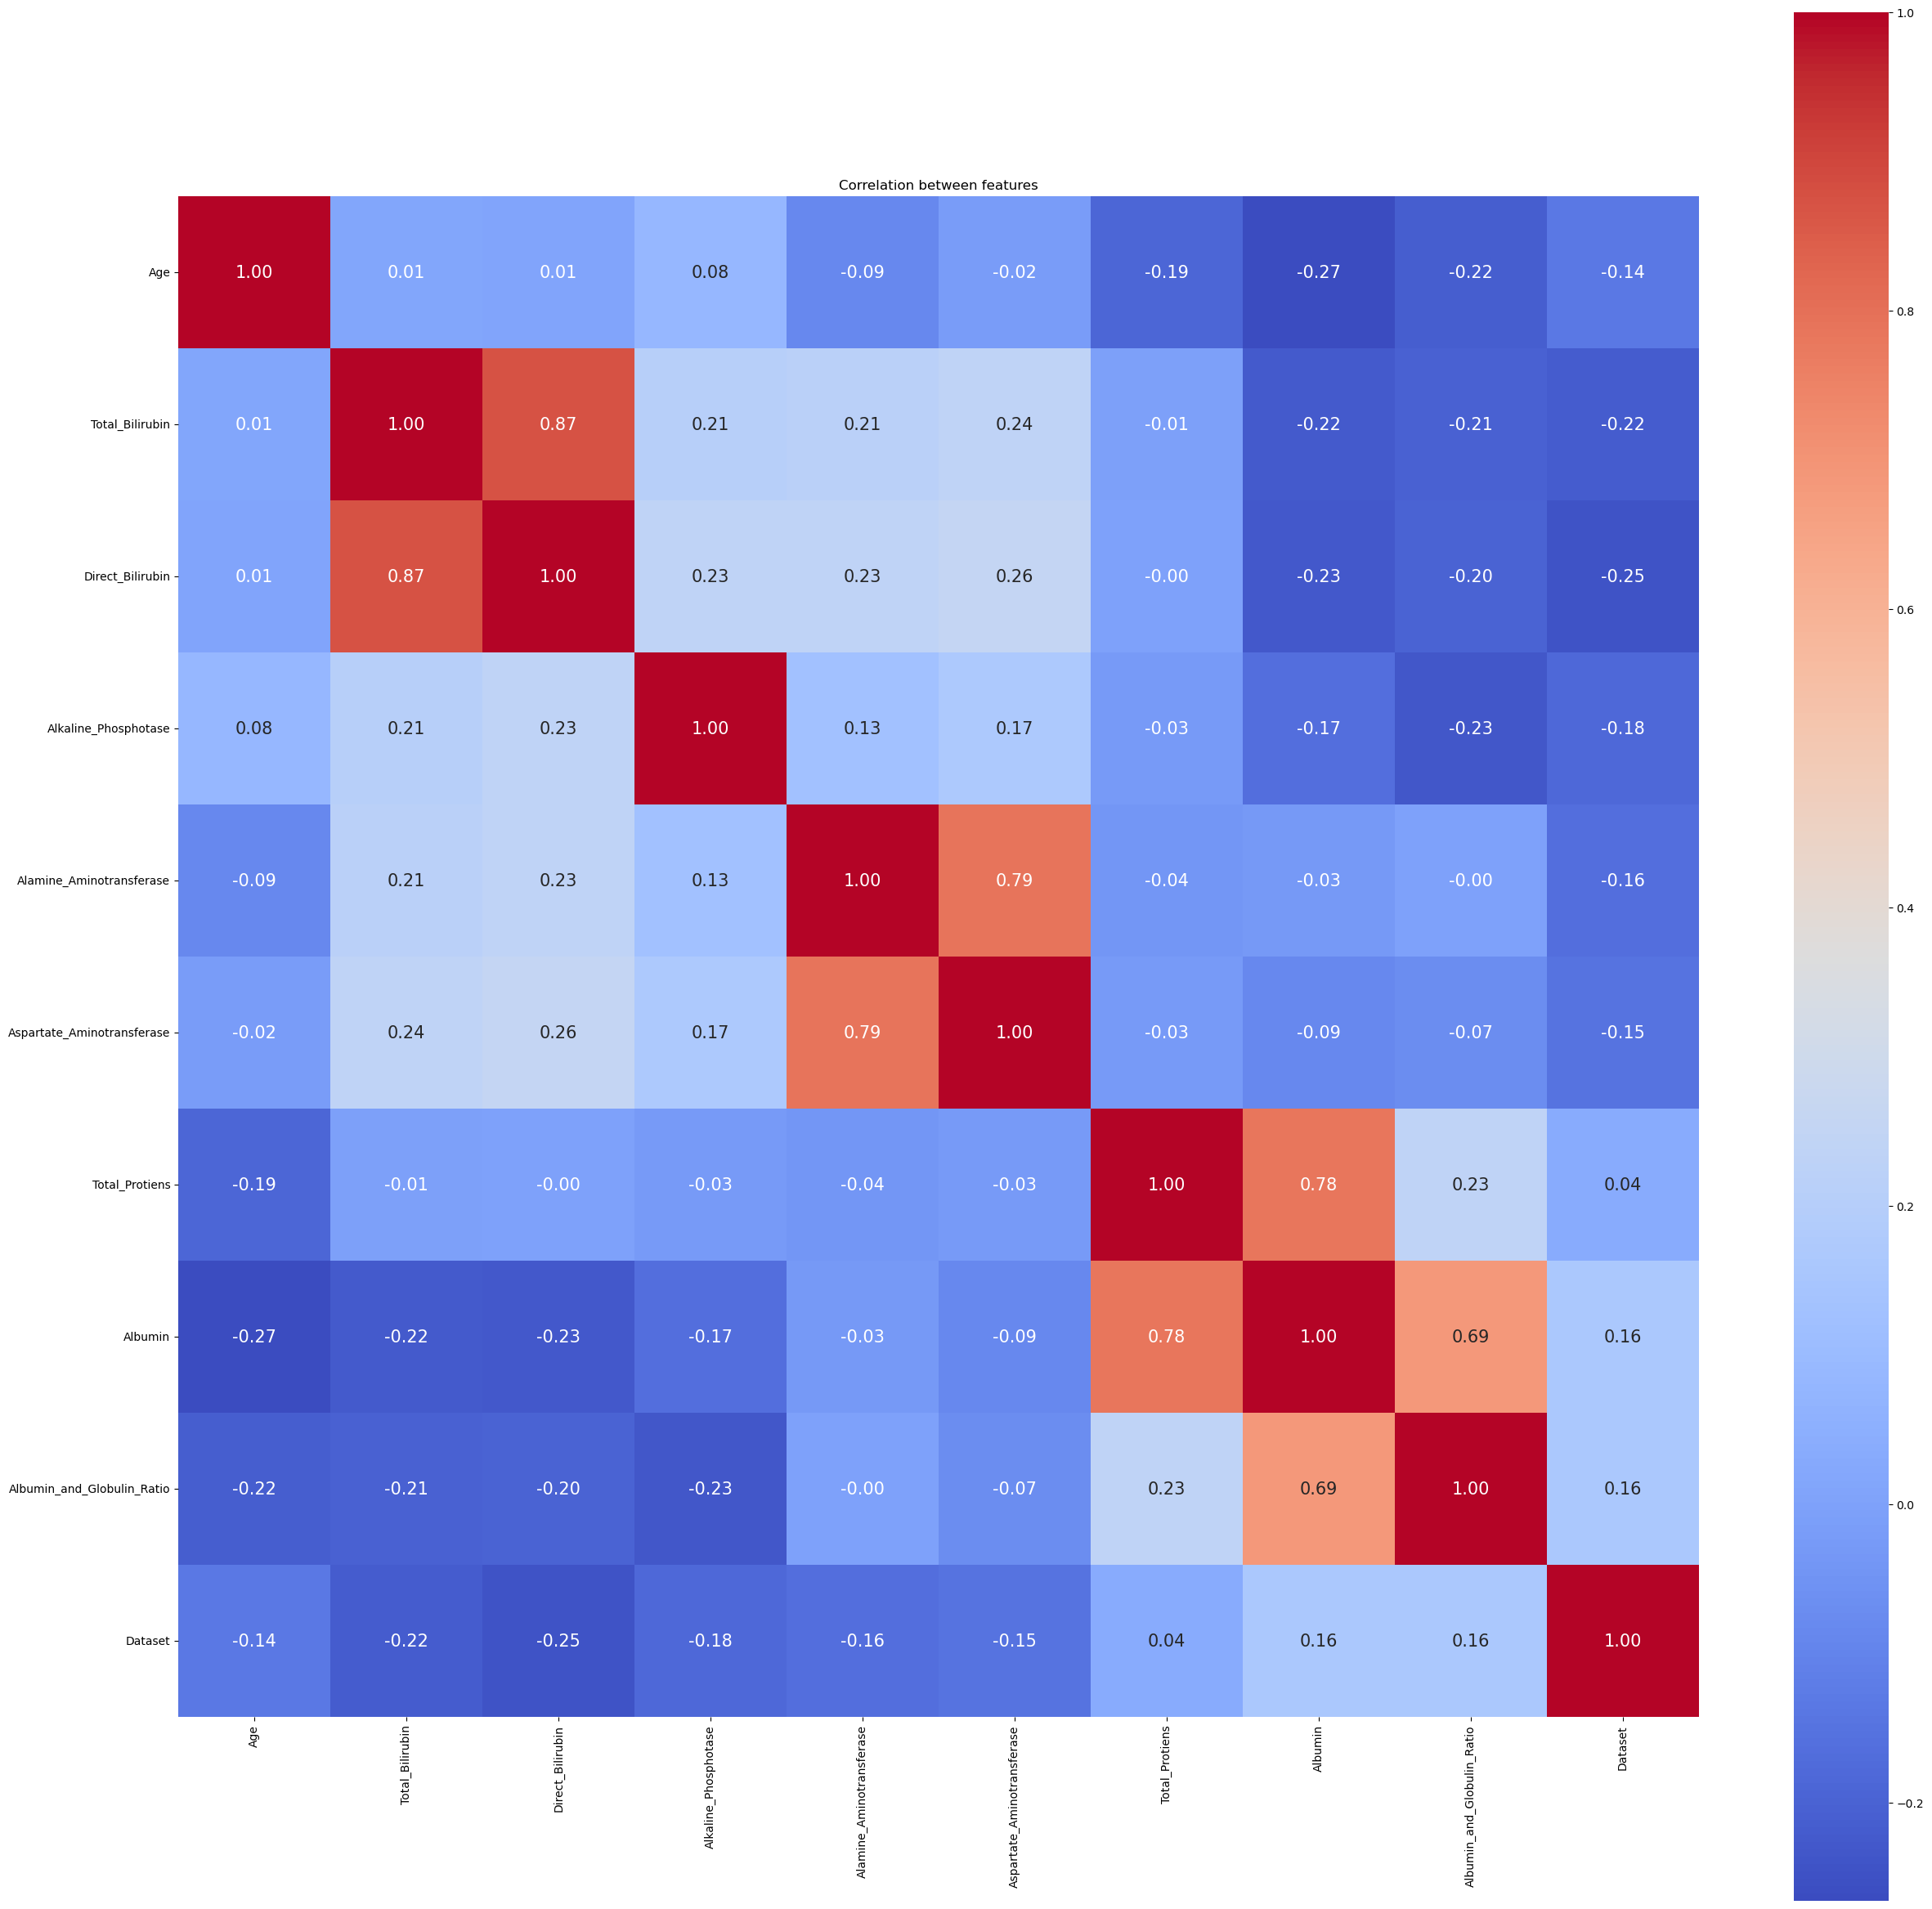

In [11]:
liver_corr = liver_data.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},cmap= 'coolwarm')
plt.title('Correlation between features')
# Direct_Bilirubin & Total_Bilirubin 0.87
# Alamine_Aminotransferase & Aspartate_Aminotransferase 0.79
# Albumin and Total Protein  0.78
# albumin_and_globulin_ratio & albumin 0.69

In [12]:
# dropping highly correlated features as features should be independent
liver_data.drop(['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin'], axis=1, inplace=True)

Data Analysis

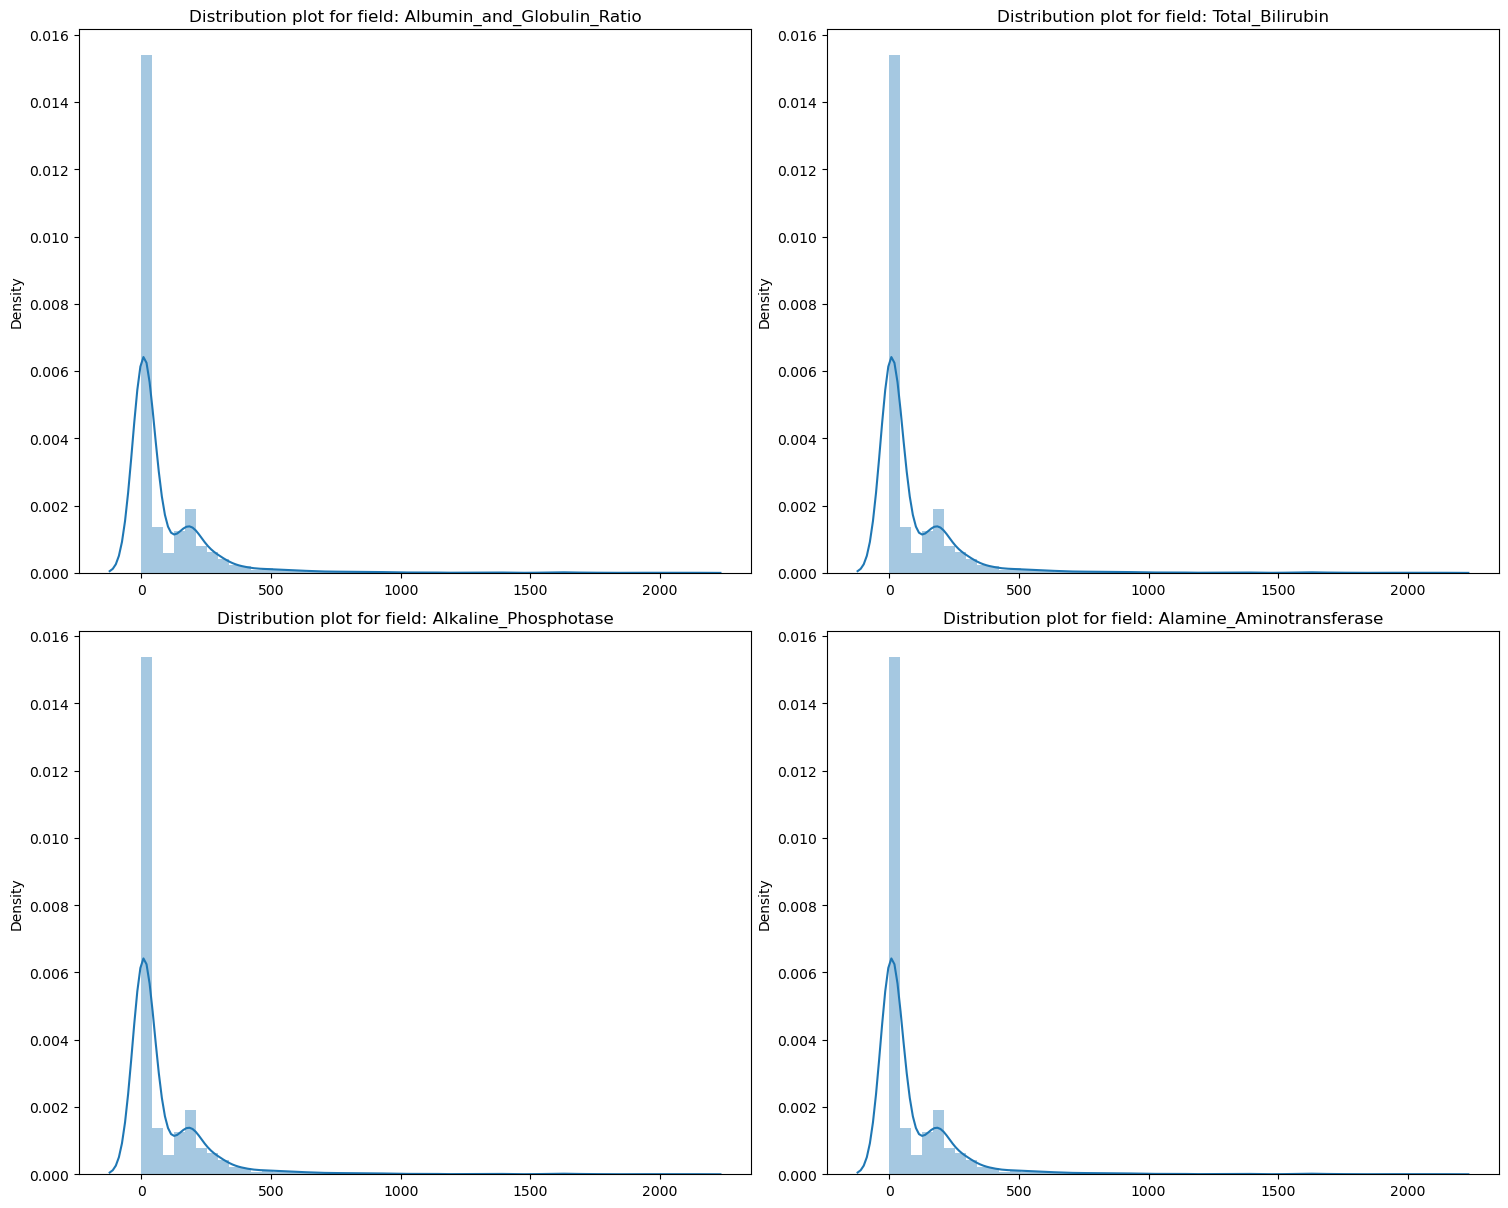

In [13]:
plt.figure(figsize=(15, 12))

features = ['Albumin_and_Globulin_Ratio', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase']

num_rows = (len(features) - 1) // 2 + 1
num_cols = 2

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.distplot(liver_data[features])
    plt.title('Distribution plot for field: ' + feature)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

In [14]:
skewness = liver_data.skew().abs()  # Absolute skewness values
print(skewness)

Age                           0.029385
Total_Bilirubin               4.907474
Alkaline_Phosphotase          3.765106
Alamine_Aminotransferase      6.549192
Albumin_and_Globulin_Ratio    0.995703
Dataset                       0.947140
dtype: float64


In [15]:
skewed = ['Albumin_and_Globulin_Ratio','Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase']

In [16]:
# Apply log1p transformation on dataframe - just selected values
for i in skewed:
    liver_data[i] = liver_data[i].apply('log1p')

In [17]:
skewness = liver_data.skew().abs()  # Absolute skewness values
print(skewness)

Age                           0.029385
Total_Bilirubin               1.728075
Alkaline_Phosphotase          1.331077
Alamine_Aminotransferase      1.473774
Albumin_and_Globulin_Ratio    0.232606
Dataset                       0.947140
dtype: float64


In [18]:
from sklearn.preprocessing import LabelEncoder, RobustScaler

In [19]:
# gender contains string values Male, Female; these will be converted into 0, 1, as ML algorithms like just numerical values
le = LabelEncoder()
liver_data['Gender'] = le.fit_transform(liver_data['Gender'])
liver_data.Gender.head()

0    0
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [20]:
# Get all attribute names except 'Dataset'
attributes = [col for col in liver_data.columns if col != 'Dataset']

rs = RobustScaler()
liver_data[attributes] = rs.fit_transform(liver_data[attributes])

liver_data.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Dataset
0,0.80,-1.0,-0.234465,-0.200886,-0.797391,-0.115796,1
1,0.68,0.0,2.572890,2.293084,0.627949,-0.532099,1
2,0.68,0.0,2.053111,1.620312,0.560449,-0.140769,1
3,0.52,0.0,0.000000,-0.252023,-0.930409,0.126945,1
4,1.08,0.0,1.292782,-0.121830,-0.267086,-1.560985,1


In [21]:
from sklearn.utils import resample
liver_data.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [22]:
# Split data on majority and minority.. minority is dataset == 2
minority = liver_data[liver_data.Dataset==2]
majority = liver_data[liver_data.Dataset==1]

print('Minority size:', minority.shape)
print('Majority size:', majority.shape)

Minority size: (167, 7)
Majority size: (416, 7)


In [23]:
# choosing upsample as even now we do not have too much data
minority_upsample = resample(minority, replace=True, n_samples=len(majority))
print('Minority upsampled size:', minority_upsample.shape)

Minority upsampled size: (416, 7)


In [24]:
# merge majority with upsampled minority
liver_data = pd.concat([minority_upsample, majority], axis=0)

In [25]:
liver_data['Dataset'] = liver_data['Dataset'].map({2: 0, 1: 1})

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(liver_data.drop('Dataset', axis=1), liver_data['Dataset'], test_size=0.25, random_state=123)

In [27]:
best_params={'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1}

In [28]:
classifier = xgb.XGBClassifier(random_state=123)
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [29]:
train_accuracy = classifier.score(X_train, Y_train)
print('Training accuracy: {:.4f}'.format(train_accuracy))
test_accuracy = classifier.score(X_test, Y_test)
print('Testing accuracy: {:.4f}'.format(test_accuracy))

Training accuracy: 1.0000
Testing accuracy: 0.8125


In [30]:
def preprocess_input(data):
    # Apply log1p transformation
    for i in skewed:
        data[i] = np.log1p(data[i])

    # Scale the data using the loaded scaler
    attributes = [col for col in data.columns if col != 'Dataset']
    data[attributes] = rs.transform(data[attributes])

    return data

input_data = (25,0,0.6,183,91,0.7)

column_names = ['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase','Alamine_Aminotransferase', 'Albumin_and_Globulin_Ratio']
# Convert the user's input into a pandas DataFrame
user_data = pd.DataFrame([input_data], columns=column_names)

# Preprocess the user's input data
preprocessed_data = preprocess_input(user_data)

prediction = classifier.predict(preprocessed_data)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have a Liver Disease')
else:
  print('The Person has Liver Disease')

[0]
The person does not have a Liver Disease


Saving the trained  and scaler

In [31]:
import pickle
filename = 'Liver Disease.pkl'
pickle.dump(classifier, open(filename, 'wb'))
filename = 'Scaler.pkl'
pickle.dump(rs, open(filename, 'wb'))